In [81]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
plt.style.use("ggplot")
pd.set_option("display.max_columns", 100)

In [4]:
df = pd.read_csv("iris.csv")
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: title={'center': 'Species Classes Count'}, xlabel='Count', ylabel='Species'>

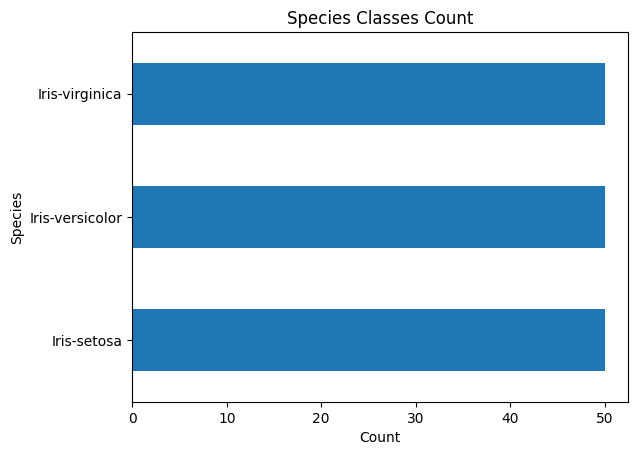

In [11]:
df["Species"].value_counts().plot(kind="barh",xlabel="Count",title="Species Classes Count")

In [17]:
df = df[[
    #'Id', 
    'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
    'Species']].copy()

In [22]:
df.rename(columns={'SepalLengthCm':"SepalLength", 'SepalWidthCm':"SepalWidth",
           'PetalLengthCm':"PetalLength", 'PetalWidthCm':"PetalWidth"},inplace=True)

In [25]:
df  = df.loc[~df.duplicated()].reset_index(drop=True).copy()
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


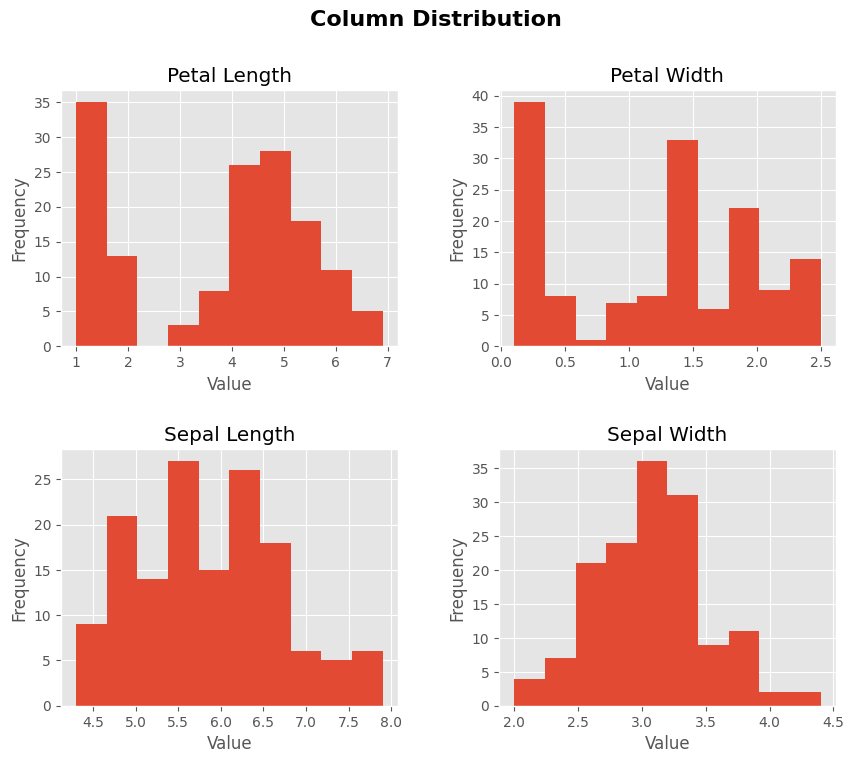

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
fig.suptitle("Column Distribution", fontsize=16, fontweight="bold")

df["PetalLength"].plot(kind="hist",ax=axes[0], xlabel="Value", title="Petal Length",)
df["PetalWidth"].plot(kind="hist",ax=axes[1], xlabel="Value", title="Petal Width",)
df["SepalLength"].plot(kind="hist",ax=axes[2], xlabel="Value", title="Sepal Length",)
df["SepalWidth"].plot(kind="hist",ax=axes[3], xlabel="Value", title="Sepal Width",)

plt.subplots_adjust(wspace=0.3, hspace=0.4)

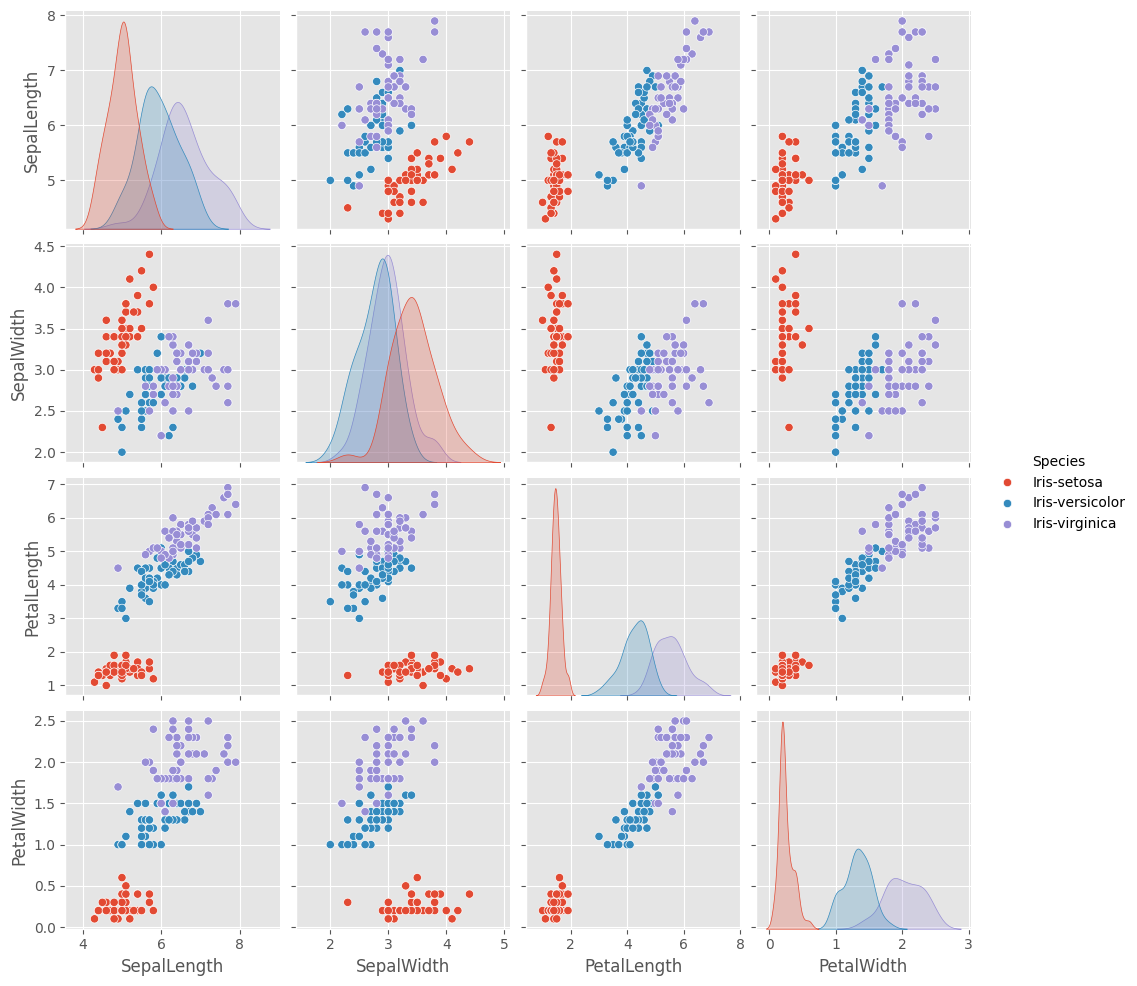

In [51]:
sns.pairplot(df,
             vars=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'],
            hue='Species')

             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109321     0.871305    0.817058
SepalWidth     -0.109321    1.000000    -0.421057   -0.356376
PetalLength     0.871305   -0.421057     1.000000    0.961883
PetalWidth      0.817058   -0.356376     0.961883    1.000000
(4, 4)
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')


<Axes: >

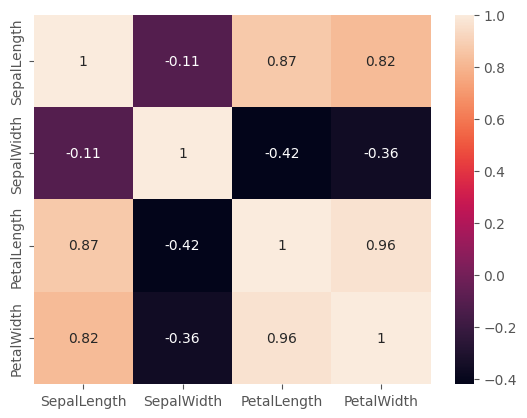

In [57]:
df_corr = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].corr()
print(df_corr)
print(df_corr.shape)
print(df_corr.columns)
print(df_corr.index)
sns.heatmap(df_corr, annot=True)

In [ ]:
x = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
x = (x-x.mean())/x.std()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.912390,1.016496,-1.353111,-1.331149
1,-1.153616,-0.127646,-1.353111,-1.331149
2,-1.394841,0.330011,-1.409958,-1.331149
3,-1.515454,0.101183,-1.296264,-1.331149
4,-1.033003,1.245325,-1.353111,-1.331149
...,...,...,...,...
142,1.017414,-0.127646,0.807071,1.439759
143,0.534963,-1.271788,0.693377,0.911967
144,0.776188,-0.127646,0.807071,1.043915
145,0.414350,0.787668,0.920765,1.439759


In [75]:
y = df[["Species"]]
# Not usable for knn and svm, requires labels of shape (num_samples,1)
# lb = LabelBinarizer()
# lb.fit(y)
# y_cat = lb.transform(y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)


c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(x, y_encoded, random_state = 42)

In [ ]:
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=5)

print("SVM enc vs not enc")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(svm, X_train,y_train, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

# Same for encoded and not encoded
cross_val_results = cross_val_score(svm, X_train_enc,y_train_enc, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')


print("KNN enc vs not enc")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(knn, X_train,y_train, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

# Same for encoded and not encoded
cross_val_results = cross_val_score(knn, X_train_enc,y_train_enc, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

SVM enc vs not enc
Cross-Validation Results (Accuracy): [1.         0.90909091 1.         0.90909091 0.95454545]
Mean Accuracy: 0.9545454545454547
Cross-Validation Results (Accuracy): [1.         0.90909091 1.         0.90909091 0.95454545]
Mean Accuracy: 0.9545454545454547
KNN enc vs not enc
Cross-Validation Results (Accuracy): [1.         0.95454545 1.         0.86363636 0.95454545]
Mean Accuracy: 0.9545454545454547
Cross-Validation Results (Accuracy): [1.         0.95454545 1.         0.86363636 0.95454545]
Mean Accuracy: 0.9545454545454547
             Species
145   Iris-virginica
42       Iris-setosa
16       Iris-setosa
10       Iris-setosa
115   Iris-virginica
..               ...
71   Iris-versicolor
106   Iris-virginica
14       Iris-setosa
92   Iris-versicolor
102   Iris-virginica

[110 rows x 1 columns]


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1